In [1023]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display

              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat_PRM=finesse.kat()
kat.verbose=1
kat_PRM.verbose=1

<h2>BASECODE</h2>

<p>Input Laser ---> BS for PRM angular sensing ---> PRM ---> BS for ITM/ETM sensing ---> ITM ---> ETM</p>

In [1024]:
kat.parse("""

maxtem 3
l laser 30 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  
mod sb1 55.5556M 0.18 3 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 n31                     #space b/w mod and PRM      


##### FOR ANGULAR SENSING PRM #####
bs pickoff 0.0001 0.9999 0 45 n31 dump n32 refl_a
s s2 0.1 refl_a a8                       
bs bsQPD 0.5 0.5 0 45 a8 a9 a10 dump            #bs to split power between two detectors 

s sQPD1 0.1 a9 a11                   
s sQPD2 0.1 a10 a12

attr s2 g 45                                 #guoy phase for det1
attr sQPD1 g 160                                 #guoy phase for det1
attr sQPD2 g 250                                #guoy phase for det2

pd1 QPDrefl1 166.6668M 0 a11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 166.6668M 90 a12                       #Split detector2 refl
pdtype QPDrefl2 x-split  


### scale all QPDs outputs ###
set QPDrefl1n QPDrefl1 re
func QPDrefl1_PRM = $QPDrefl1n*10000000
set QPDrefl2n QPDrefl2 re
func QPDrefl2_PRM = $QPDrefl2n*10000000
###############################

#######################


##### FOR ANGULAR SENSING ITM/ETM #####
s sr 0.01 n12 n12a    
bs pickoff1 0.0001 0.9999 0 45 n12a dump n121 refl_itm
s s21 0.1 refl_itm a81                       
bs bsQPD1 0.5 0.5 0 45 a81 a91 a101 dump            #bs to split power between two detectors 

s sQPD11 0.1 a91 a11a                   
s sQPD21 0.1 a101 a12a

attr s21 g 10                                 #guoy phase for det1
attr sQPD11 g 80                                 #guoy phase for det1
attr sQPD21 g 350                                #guoy phase for det2

pd1 QPDrefl1_itm 55.5556M 0 a11a                       #Split detector1 refl
pdtype QPDrefl1_itm x-split   
pd1 QPDrefl2_itm 55.5556M 90 a12a                       #Split detector2 refl
pdtype QPDrefl2_itm x-split  

#########################



####### 3 m setup ###########

s gap03 0.5 n32 refl

m PRM 0.759 0.1 90 refl pop               #PRM                ---> POP <---
#m PRM 0 1 90 refl pop               #PRM
s PRC 1.350 pop b3                        #PRC 
m ITM 0.98997 0.01 0 b3 n12              #ITM
s ARM 3.29 n121 b5                        #ARM length 3.3 (0.01 from sr length) 
m ETM 0.99996 0.00001 90 b5 b6           #ETM
#m ETM 0 1 0 b5 b6 

################################
cav ARML ITM n12 ETM b5 
cav PRCL PRM pop ITM b3

trace 2 


##### attr for TM ######

attr ETM Rc 11.3            # RoC of ETM
attr PRM Rc -23.6           # RoC of PRM

attr PRM xbeta 0            # misalgnment 
attr ETM xbeta 0         
attr ITM xbeta 0 
######################


##### PD #######

pd circ_arm b5
pd circ_prc pop
pd refl refl
pd trans b6
 

pd1 refl_I 55.5556M 0 refl_a              # REFL I  1f
pd1 refl_Q 55.5556M 90 refl_a             # REFL Q  1f
pd1 refl_I_f3 166.6668M 236.65738162 refl_a          # REFL I  3f
pd1 refl_Q_f3 166.6668M 90 refl_a         # REFL Q  3f
pd1 pop_I_raw 55.5556M 107.63819095 pop                # POP I  1f
pd1 pop_Q_raw 55.5556M 90 pop               # POP Q  1f
pd1 pop_I_f3_raw 166.6668M 0 pop            # POP I  3f
pd1 pop_Q_f3_raw 166.6668M 90 pop           # POP Q  3f

################


yaxis lin abs

 

""")

Parsing `set QPDrefl1n QPDrefl1 re` into pykat object not implemented yet, added as extra line.
Parsing `set QPDrefl2n QPDrefl2 re` into pykat object not implemented yet, added as extra line.


Parsing `set errs refl_I_f3 re` into pykat object not implemented yet, added as extra line.
Parsing `set err pop_I_raw re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-24 00:04:02.120126


100% | ETA:  0:00:00 | Calculating - Locked X✓ (Locking steps tried 616/10000) 

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1208.41 seconds


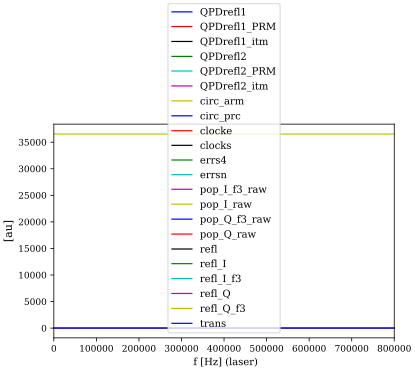


--- Output info ---

Run date and time: 2022-10-24 00:04:02.122371
Detectors used: QPDrefl1, QPDrefl1_PRM, QPDrefl1_itm, QPDrefl2, QPDrefl2_PRM, QPDrefl2_itm, circ_arm, circ_prc, clocke, clocks, errs4, errsn, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans

One xaxis used: ['xaxis laser f lin 0 800000 1000']
QPDrefl1     : min = 0.000000000000000e+00 max = 0.000000000000000e+00
QPDrefl2     : min = 0.000000000000000e+00 max = 0.000000000000000e+00
QPDrefl1_itm : min = 0.000000000000000e+00 max = 0.000000000000000e+00
QPDrefl2_itm : min = 0.000000000000000e+00 max = 0.000000000000000e+00
circ_arm     : min = 3.653376467233460e+04 max = 3.657200051176360e+04
circ_prc     : min = 9.972988641350680e+01 max = 9.983036603887609e+01
refl         : min = 3.205887519950430e+00 max = 3.228926544702090e+00
trans        : min = 3.653522608137790e-01 max = 3.657346345030160e-01
refl_I       : min = 6.598224801603940e-08 max = 3.916546232561270e-0

In [1025]:
kat1 = kat.deepcopy()
kat1.parse("""

############################# DON'T TOUCH LOCK PARAMS #############################


xaxis laser f lin 0 800k 1000
#xaxis ETM phi lin 88 92 1000


### LOCK PRM ####
set errs refl_I_f3 re
func errsn = $errs*100000
lock clocks $errsn 0.216 0.01m
put* PRM phi $clocks
noplot clocks
#####

#### LOCK ETM ####
set err pop_I_raw re
func errs4 = $err*0.00001
lock clocke $errs4 8.63 0.01m
put* ETM phi $clocke
noplot clocke
####

############################# ###################### #############################




""")
out=kat1.run()
out.plot()
out.info()

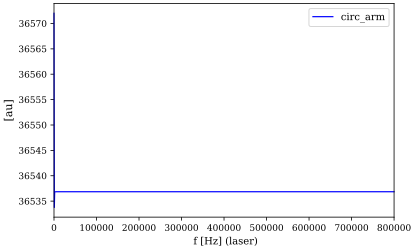

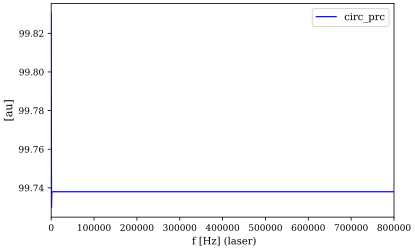

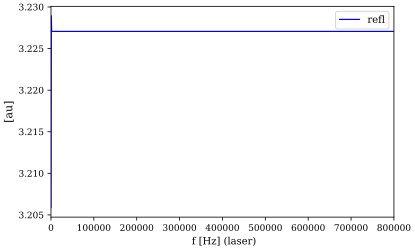

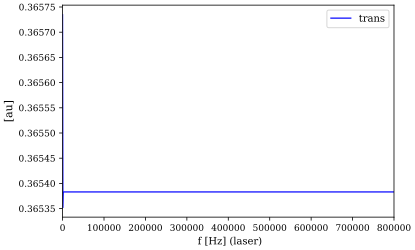

In [1026]:
out.plot(['circ_arm'])
out.plot(['circ_prc'])
out.plot(['refl'])
out.plot(['trans'])

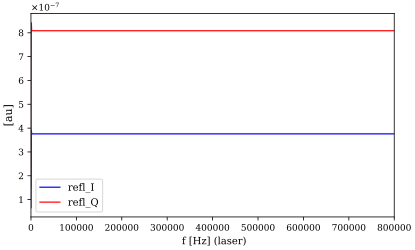

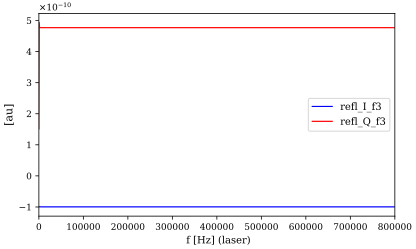

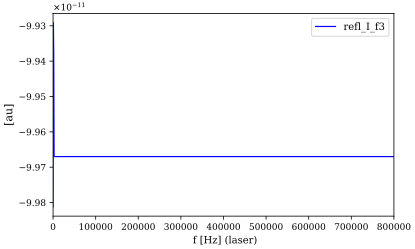

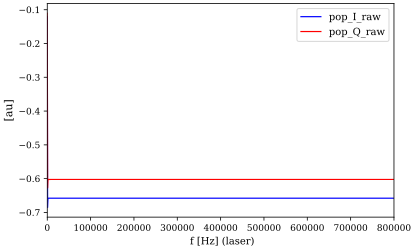

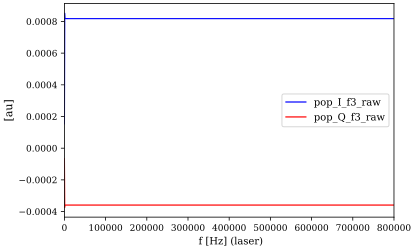

In [1027]:
out.plot(['refl_I','refl_Q'])
out.plot(['refl_I_f3','refl_Q_f3'])
out.plot(['refl_I_f3'])
out.plot(['pop_I_raw','pop_Q_raw'])
out.plot(['pop_I_f3_raw','pop_Q_f3_raw'])

In [1028]:
#i=0
#for i in np.arange(0, 360,10):
#    kat1.refl_I.phase1 = i
#    kat1.refl_Q.phase1 = i+90
#    #kat1.refl_I_f3.phase1 = i
#    #kat1.refl_Q_f3.phase1 = i+90
#    #kat1.pop_I_raw.phase1 = i
#    #kat1.pop_Q_raw.phase1 = i+90
#    kat1.pop_I_f3_raw.phase1 = i
#    kat1.pop_Q_f3_raw.phase1 = i+90
#    out = kat1.run()
#    out.info()
#    out.plot(['refl_I','refl_Q'])
#    out.plot(['pop_I_f3_raw','pop_Q_f3_raw'])
##
#    #out.plot(['refl_I'])
#    #out.plot(['refl_Q'])
#    #out.plot(['refl_I','refl_Q'])
#
#    #out.plot(['circ_arm'])
#    #out.plot(['circ_prc'])
#    #out.plot(['refl'])
#    #out.plot(['trans'])
#    print(i)

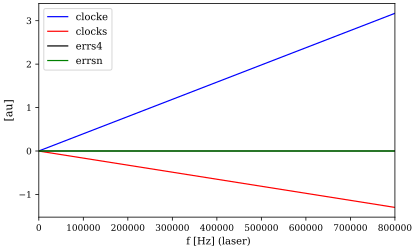

In [1029]:
out.plot(['clocke','clocks','errs4','errsn'])

In [1030]:
(out["refl_I"][502]-out["refl_I"][498])/(out.x[502]-out.x[498])

6.7179155811138925e-19

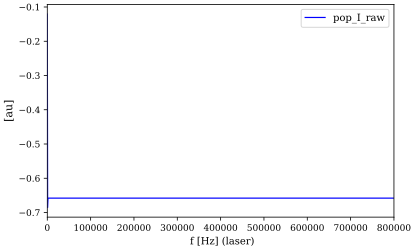

In [1031]:
out.plot(['pop_I_raw'])

In [1032]:
(out["pop_I_raw"][502]-out["pop_I_raw"][498])/(out.x[502]-out.x[498])

6.262969309833721e-14

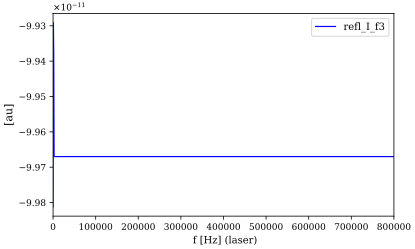

In [1033]:
out.plot(['refl_I_f3'])

In [1034]:
(out["refl_I_f3"][502]-out["refl_I_f3"][498])/(out.x[502]-out.x[498])

2.3762782579503087e-23